# Importing the dependencies


In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
!pip install xgboost
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [9]:
# Importing datset

df= pd.read_csv(r'C:\Users\DELL\Desktop\Uday\Machine Learning\Train.csv')

In [7]:
# python displays the top 5 rows by default

df.head() 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [11]:
# The info() method provides a concise summary of the DataFrame, including the data types of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [15]:
# To know the number of missing data points per column

df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# Missing Data:
# 1. Outlet_Size: 2410 missing values (categorical)
# 2. Item_Weight: 1463 missing values

# Handling Missing Values:
# 1. Use intuition: Why are values missing?
# 2. Not recorded? -> Impute (mean, mode, etc.)
# 3. Doesn't exist? -> Keep as NaN or drop.

# Next Steps: Choose between mean and mode imputation.

# Exploratory Data Analysis - EDA


In [17]:
# to know the descriptive statistics about the dataset
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


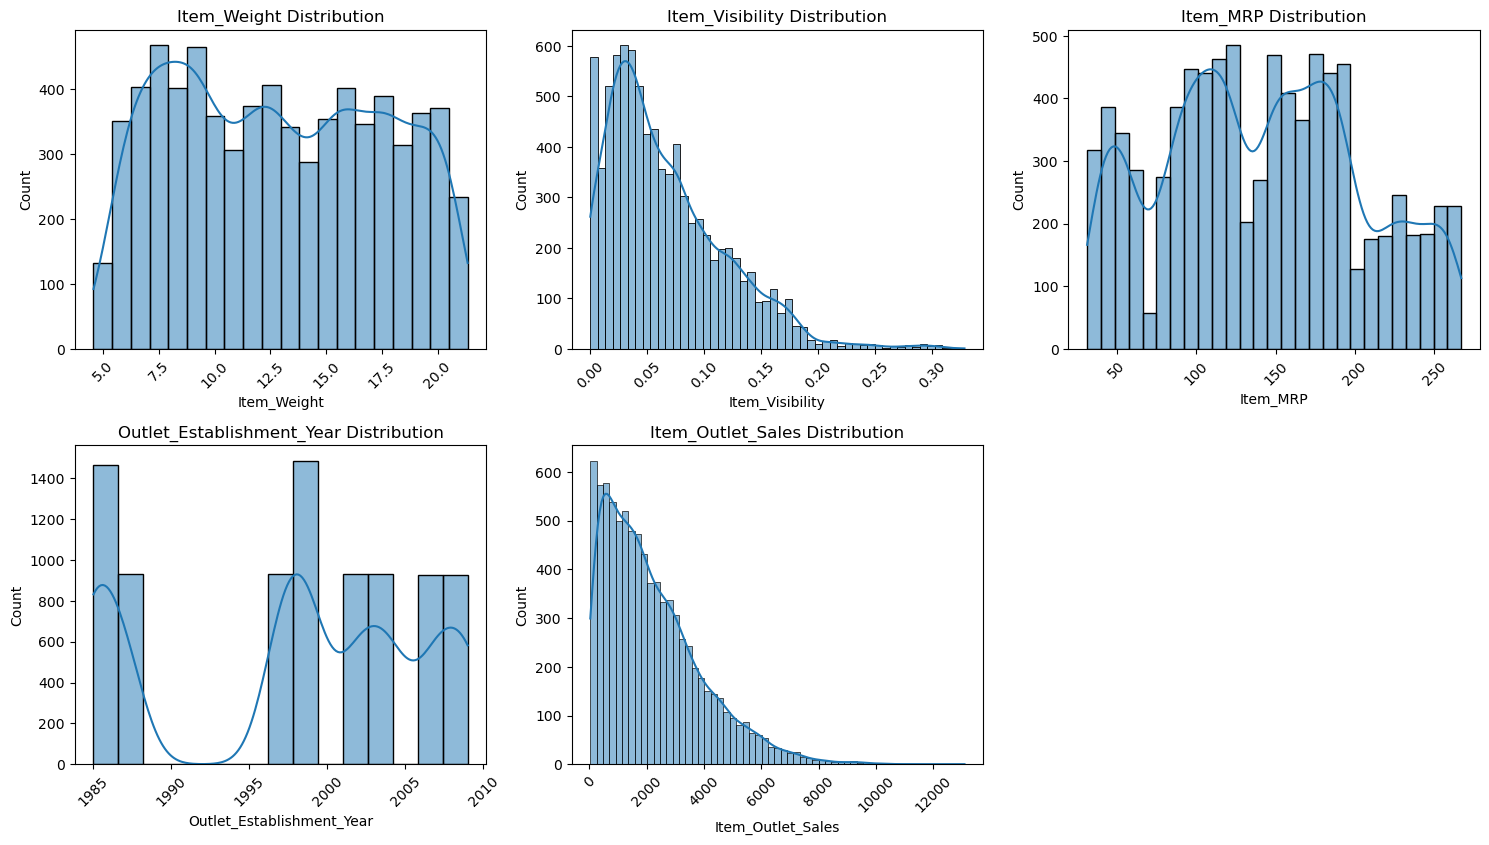

In [22]:
Numeric_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 
                'Outlet_Establishment_Year', 'Item_Outlet_Sales']

# Adjust figure size
plt.figure(figsize=(15, 12))  

for i, col in enumerate(Numeric_cols):
    plt.subplot(3, 3, i+1)  # Create subplots in a 3x3 grid
    sns.histplot(data=df, x=col, kde=True)  # Add KDE for better distribution visualization
    plt.title(f'{col} Distribution')  # Title for each subplot
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

In [ ]:
# Observations:
# 1.Item weight range: 5 Kg to 20 Kg.
# 2. Item_Visibility: Right skewed. (consider transformation for normal distribution).
# 3. Item_MRP: More products in the 100-180 MRP range.
# 4. Outlet_Establishment_Year: Many stores established in 1985, 1998, with a gap between 1990 and 1995.
# 5. Item_Outlet_Sales: Right skewed (consider transformation for normal distribution).

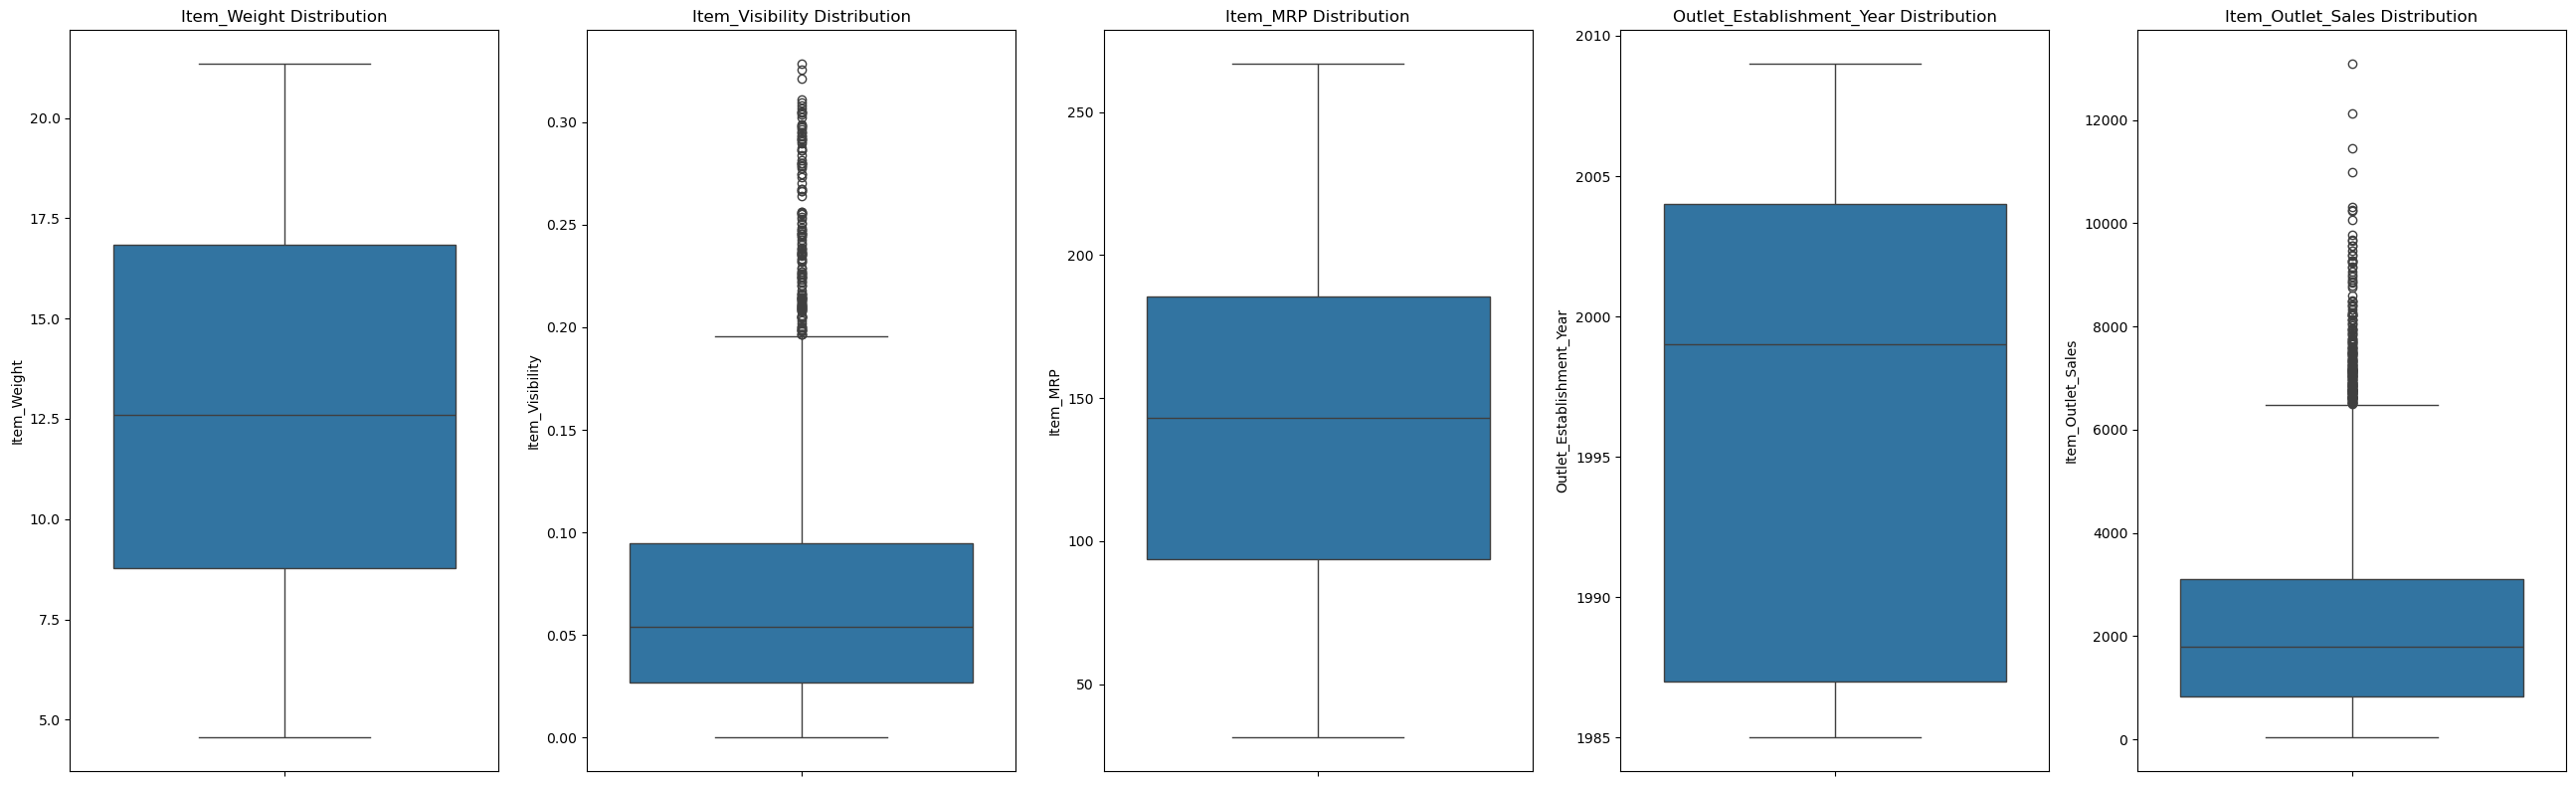

In [26]:
Numeric_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 
                'Outlet_Establishment_Year', 'Item_Outlet_Sales']

# Adjust figure size
plt.figure(figsize=(26, 8))  

for i, col in enumerate(Numeric_cols):
    plt.subplot(1, 5, i+1)  # Create subplots in a 1x5 grid
    sns.boxplot(data=df, y=col)  # to see outliers
    plt.title(f'{col} Distribution')  # Title for each subplot
    plt.xticks(rotation=45)
    plt.tight_layout()


    plt.subplot(1, 5, i + 1)  # Bottom row: violin plots
    sns.violinplot(data=df, y=col)
    plt.title(f'{col} - Violinplot')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

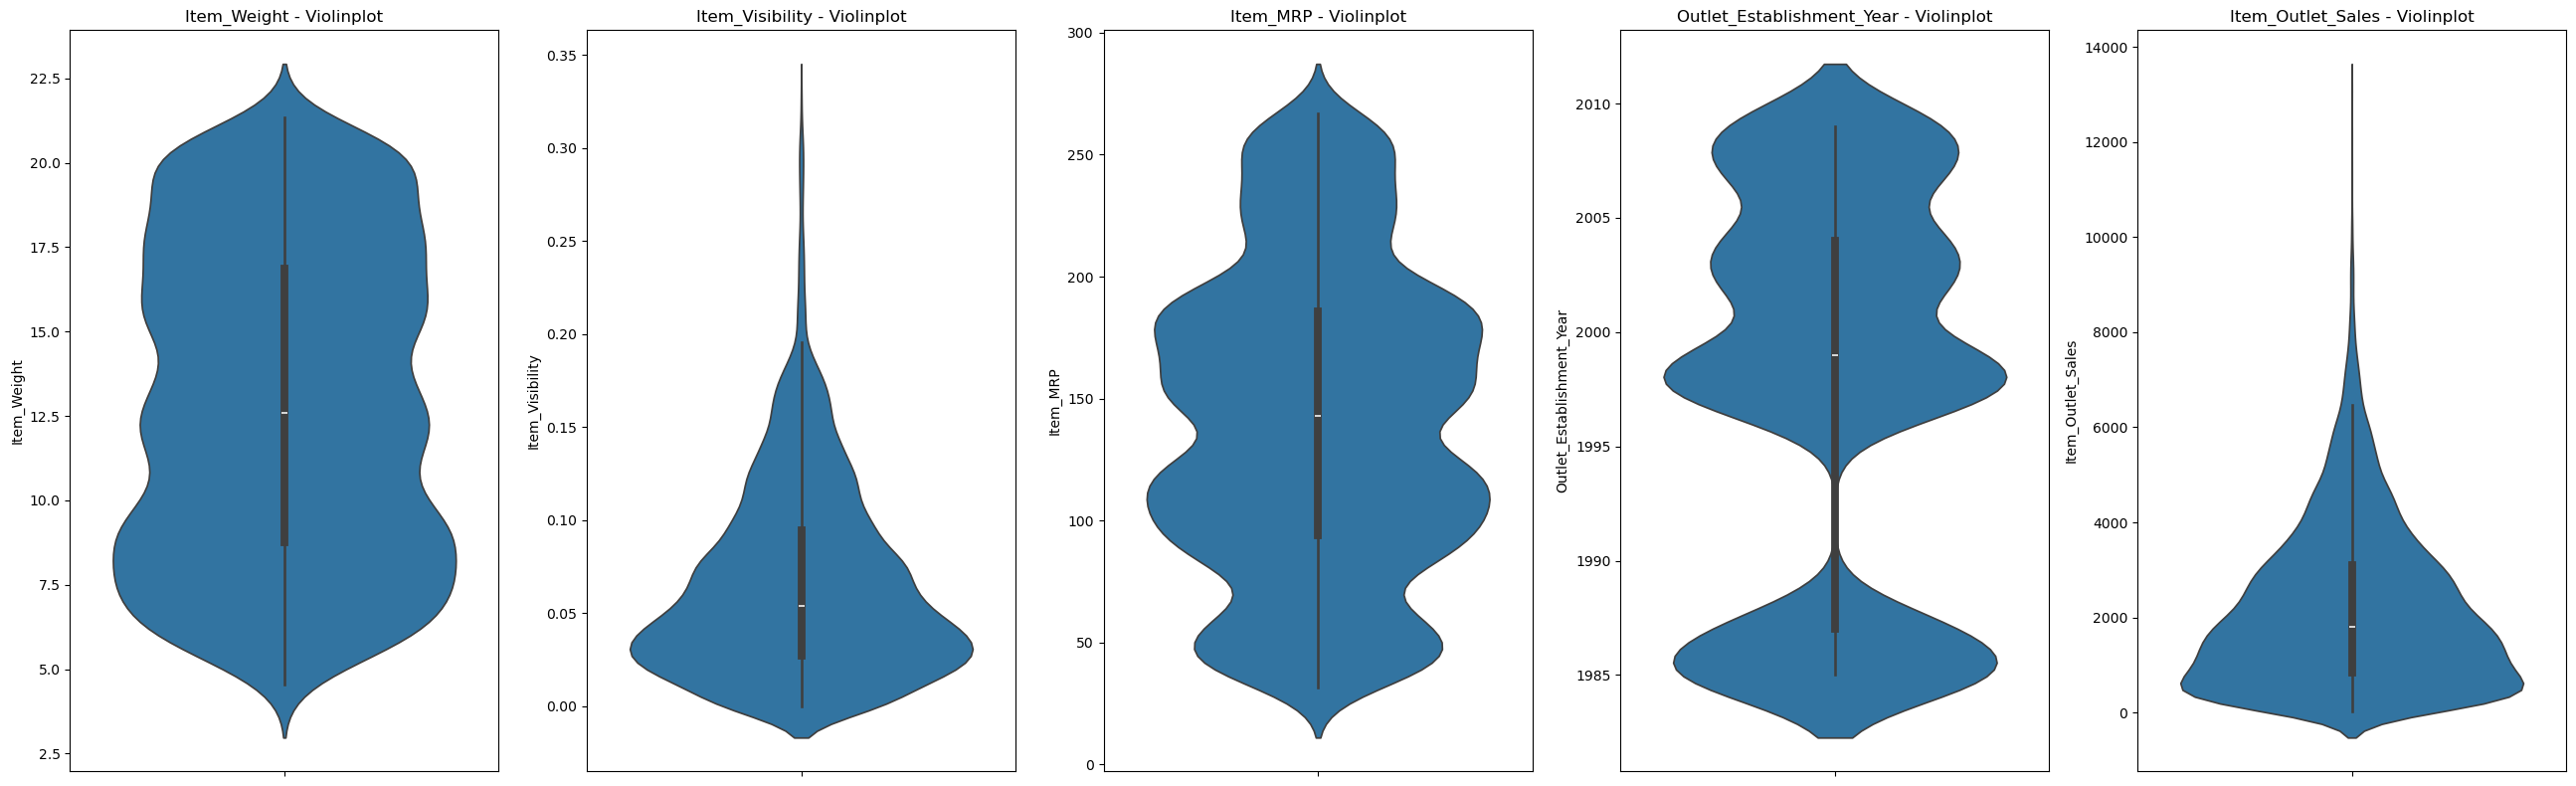

In [35]:
Numeric_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 
                'Outlet_Establishment_Year', 'Item_Outlet_Sales']

# Adjust figure size
plt.figure(figsize=(26, 8))  

for i, col in enumerate(Numeric_cols):

    plt.subplot(1, 5, i + 1)  # Bottom row: violin plots
    sns.violinplot(data=df, y=col)
    plt.title(f'{col} - Violinplot')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

In [ ]:
# Outliers:
# 1. Item_Weight, Item_MRP, Outlet_Establishment_Year: Almost no outliers.
# 2. Item_Visibility, Item_Outlet_Sales: Some outliers to be removed.
# 3.Distribution: violen plots shows similar distributions.

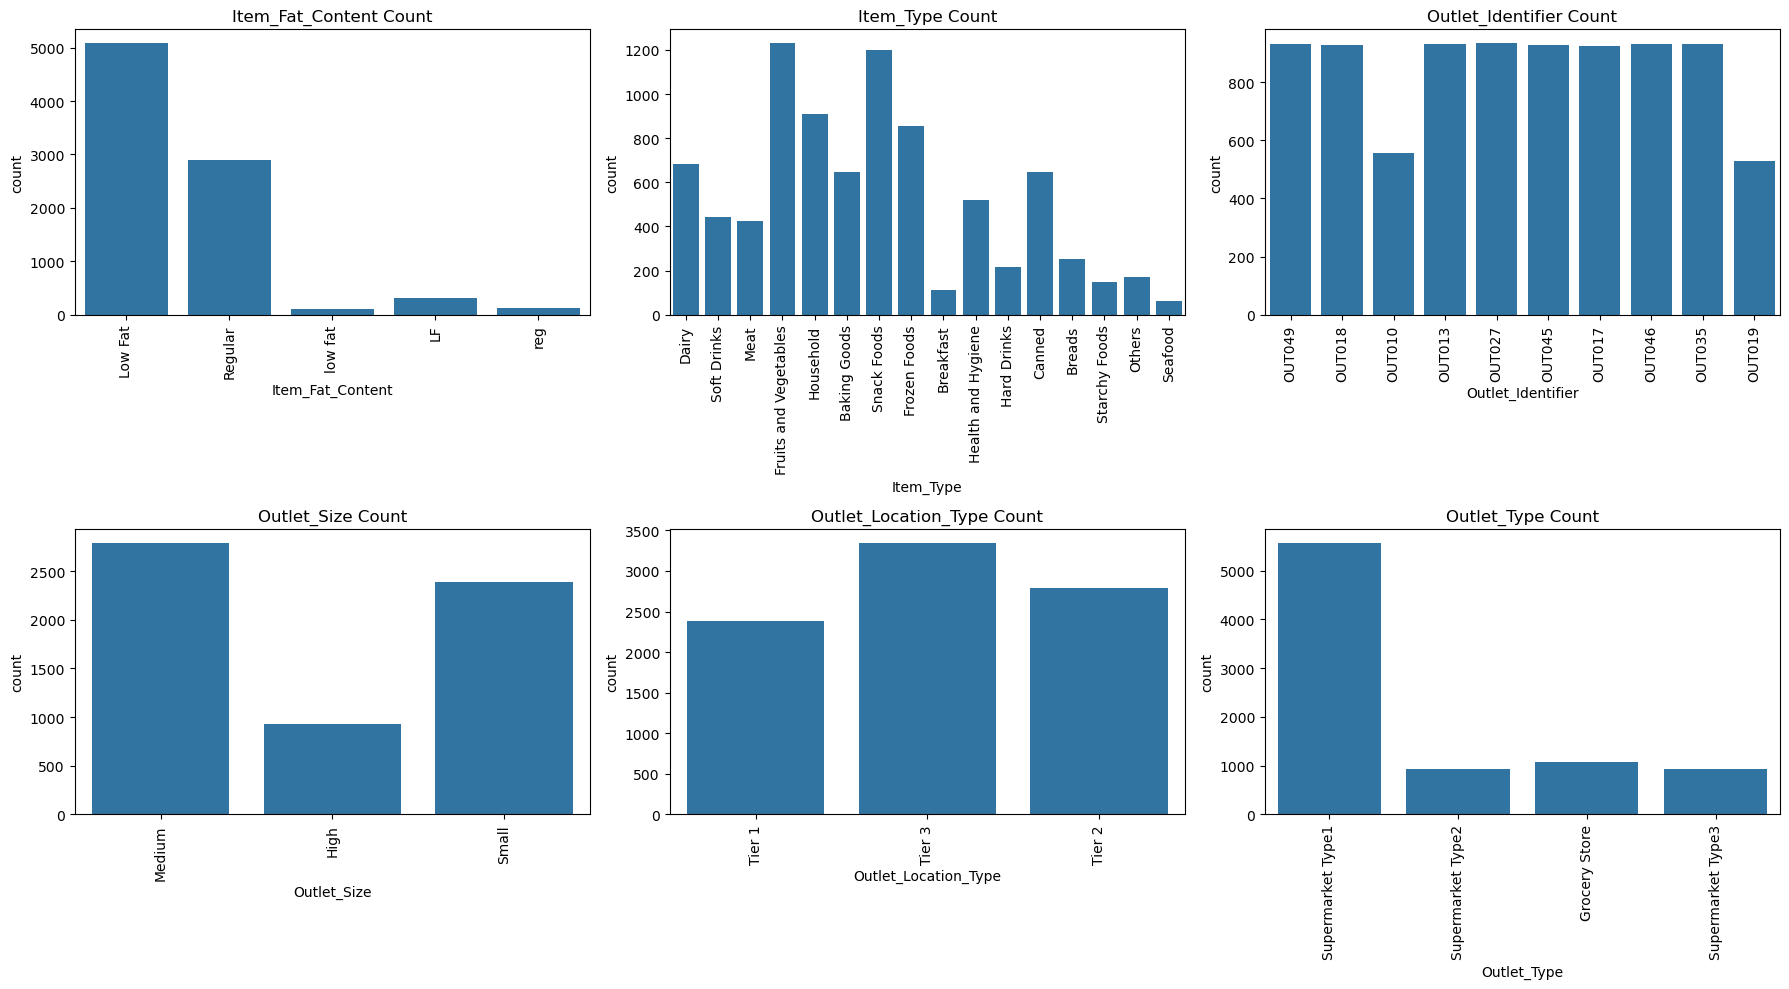

In [43]:
categorical_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 
                    'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

plt.figure(figsize=(18, 10))  # figure size

for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i + 1)  # Create subplot in 2 rows, 3 columns
    sns.countplot(data=df, x=col)
    plt.title(f'{col} Count')
    plt.xticks(rotation=90)
    plt.tight_layout()

plt.show()


In [ ]:
# Additional Observations:
# 1. Item_Fat_Content: Needs cleaning to unify categories (e.g., 'Low Fat', 'low fat', and 'LF').
# 2. Outlet_Location_Type: Can be encoded by extracting the last character (e.g., 'Tier 1' to 1).

# Bivariate Analysis


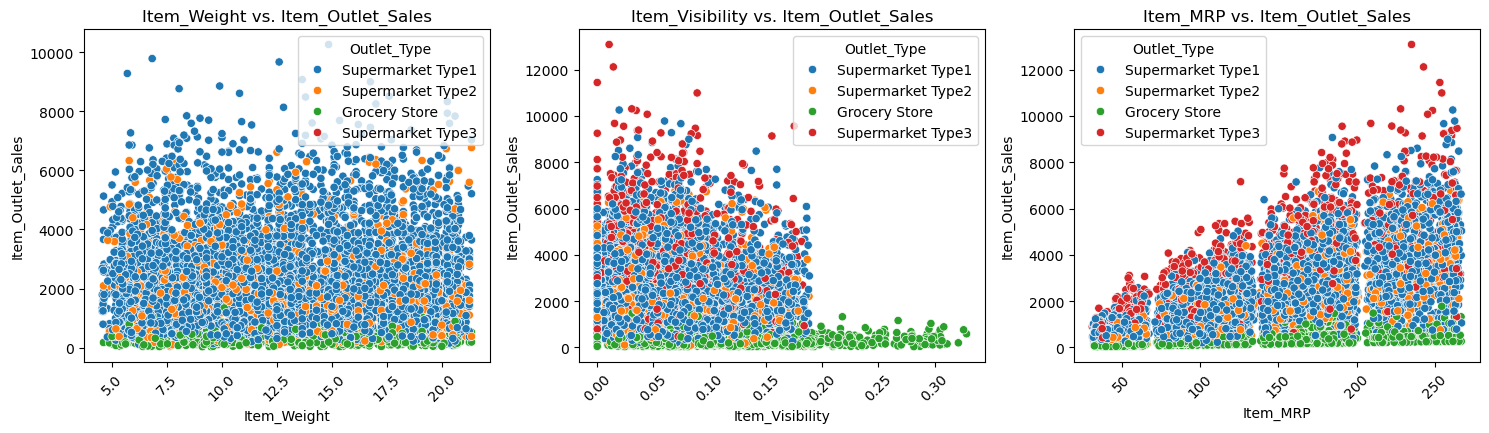

In [51]:
# 2. Scatterplots vs. Item_Outlet_Sales with hue by Outlet_Type

Numeric_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP']             

# Adjust figure size
plt.figure(figsize=(15, 12))  

for i, col in enumerate(Numeric_cols):
    plt.subplot(3, 3, i+1)  # Create subplots in a 3x3 grid
    sns.scatterplot(data=df, x=col, y='Item_Outlet_Sales', hue= 'Outlet_Type')
    plt.title(f'{col} vs. Item_Outlet_Sales')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

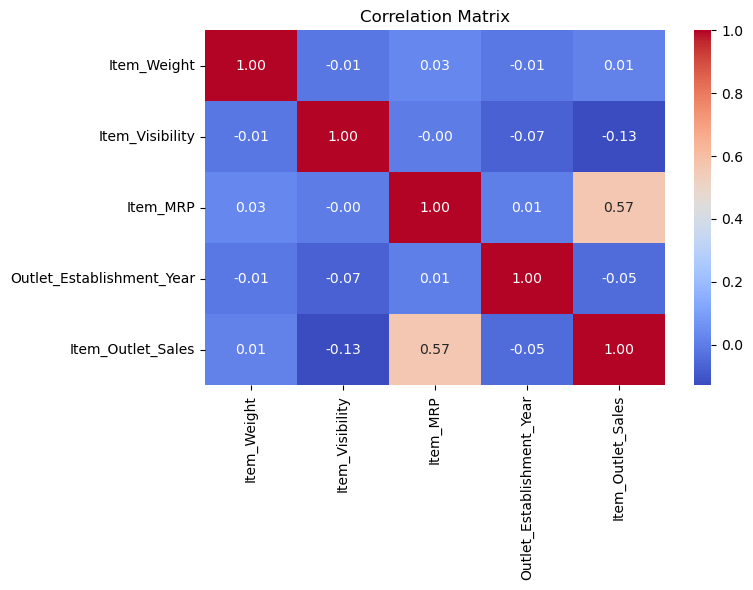

In [55]:
# 1. Correlation Matrix Heatmap

Numeric_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 
                'Outlet_Establishment_Year', 'Item_Outlet_Sales']

# Compute the correlation matrix
corr_matrix = df[Numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

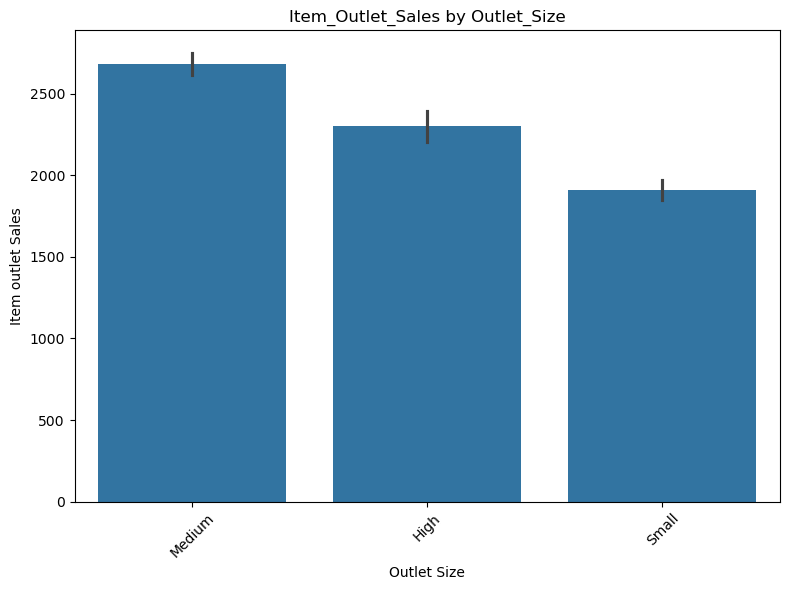

In [59]:
plt.figure(figsize=(8, 6))
sns.barplot(
    data=df,
    x='Outlet_Size',
    y='Item_Outlet_Sales',
)
plt.title('Item_Outlet_Sales by Outlet_Size')
plt.xlabel('Outlet Size')
plt.ylabel('Item outlet Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Missing values

In [62]:
df.isnull().sum()  

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
1. Item_weight is numeric with no outliers. Missing values will be filled with the mean.
2. Outlet_Size is categorical; missing values can be filled with the mode.

In [64]:
df['Item_Weight'].mean()

12.857645184135976

In [66]:
# adding 'na' values in column in item_weight with mean of column

df['Item_Weight']= df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [68]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# Replacing the missing values in 'outlet size' with mode

In [70]:
df.groupby('Outlet_Type')['Outlet_Size'].agg(lambda x: x.mode()[0])

Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object

In [72]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(
    df.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.mode()[0]))


In [74]:
df['Outlet_Size']

0       Medium
1       Medium
2       Medium
3        Small
4         High
         ...  
8518      High
8519     Small
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [ ]:
# All null values have been addressed

In [76]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Encoding Categorical values


In [80]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [82]:
mapping = {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}
df['Item_Fat_Content'].replace(mapping, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_19232\2568384199.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Fat_Content'].replace(mapping, inplace=True)


In [84]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [86]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [92]:
col = ['Item_Identifier' , 'Item_Fat_Content' , 'Item_Type', 'Outlet_Identifier', 'Outlet_Size' , 'Outlet_Location_Type', 'Outlet_Type']

for i in col:
     # Fit the encoder on the column and transform them to integers
    label_encoder = LabelEncoder()
    df[i] = label_encoder.fit_transform(df[i])

In [94]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# Pre-Processing data

In [97]:
x= df.drop('Item_Outlet_Sales', axis=1)

In [99]:
y=df['Item_Outlet_Sales']

In [101]:
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,1,0.000000,6,182.0950,0,1998,2,2,0
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2


In [103]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

# Modeling

In [ ]:
# Split into 80% train and 20% test

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

# Check the shapes
print("X_train shape:", x.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", x_train.shape)

X_train shape: (8523, 11)
X_test shape: (1705, 11)
y_train shape: (6818, 11)


In [ ]:
# comparing the performance of models

In [114]:
# Function to compare models
def evaluate_models_with_cv(X_train, X_test, y_train, y_test, cv=5):
    models = {
        # Define models
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(),
        'Lasso Regression': Lasso(),
        'Bayesian Ridge': BayesianRidge(),
        'Polynomial Regression (degree=2)': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
        'Support Vector Regressor': make_pipeline(StandardScaler(), SVR()),
        'Random Forest': RandomForestRegressor(random_state=42),
        'XGBoost': XGBRegressor(random_state=42)
    }

    results = []

    for name, model in models.items():
        try:
            model.fit(X_train, y_train)

            # Predictions
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)

            # Cross-validation R2 (on training set)
            cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
            cv_r2 = np.mean(cv_scores)

            # Metrics
            train_r2 = r2_score(y_train, y_train_pred)
            test_r2 = r2_score(y_test, y_test_pred)

            train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
            test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

            test_mae = mean_absolute_error(y_test, y_test_pred)
           
            # Store results
            results.append({
                'Model': name,
                'CV R2': round(cv_r2, 4),
                'Train R2': round(train_r2, 4),
                'Test R2': round(test_r2, 4),
                'Train RMSE': round(train_rmse, 2),
                'Test RMSE': round(test_rmse, 2),
                'MAE (Test)': round(test_mae, 2)
            })

        except Exception as e:
            print(f"Model {name} failed: {e}")
    
    return pd.DataFrame(results).sort_values(by='Test R2', ascending=False)

In [116]:
results_df = evaluate_models_with_cv(x_train, x_test, y_train, y_test)
print(results_df)


                              Model   CV R2  Train R2  Test R2  Train RMSE  \
4  Polynomial Regression (degree=2)  0.5900    0.6010   0.5778     1069.61   
6                     Random Forest  0.5581    0.9384   0.5522      420.28   
7                           XGBoost  0.5149    0.8762   0.5017      595.72   
0                 Linear Regression  0.5047    0.5072   0.4891     1188.65   
1                  Ridge Regression  0.5047    0.5072   0.4890     1188.66   
2                  Lasso Regression  0.5045    0.5070   0.4885     1188.83   
3                    Bayesian Ridge  0.5044    0.5070   0.4884     1188.93   
5          Support Vector Regressor  0.0329    0.0534   0.0343     1647.43   

   Test RMSE  MAE (Test)  
4    1141.65      815.78  
6    1175.76      824.17  
7    1240.25      866.26  
0    1255.82      944.87  
1    1255.93      945.02  
2    1256.57      945.90  
3    1256.71      946.05  
5    1726.58     1263.08  


# Summary on Analysis

In [ ]:
# Executive Summary

1. Strongest Hold-out Performance

   The Polynomial Regression model leads on CV R² (0.59) and Test R² (0.578), with the lowest Test MAE (≈ 816).
2. Signs of Overfitting

   Random Forest and XGBoost exhibit very high Train R² (0.94 and 0.88) but much lower CV R² and Test R², indicating overfitting to training data.
3. Baseline Linear Models

   Linear, Ridge, Lasso, and Bayesian Ridge all converge at a modest CV R² ≈ 0.505 and Test R² ≈ 0.489, with Test RMSE ≈ 1,256—establishing our lower bound.

4. Poorly Performing SVR

   Support Vector Regressor severely underfits (CV R² ≈ 0.03), yielding the highest errors.

---

# 2. Key Takeaways

  Polynomial features (degree 2) capture non-linearity better than plain linear models, boosting R² by \~17 points over baseline.
  Tree-based models require stronger regularization or pruning; their inflated Train R² vs. CV R² gap (\~0.38 for RF) signals unstable generalization.
  Error metrics (Test RMSE \~1,140–1,255; Test MAE \~815–945) suggest high residual variance—there’s room for tighter predictions.

---

# 3. Immediate Recommendations

1. Transform Distributions

   Apply log or Box–Cox transforms (or standardize via z-score) to skewed features (e.g., `Item_Visibility`, `Item_MRP`).
   Rationale: Stabilizes variance, often delivers a \~2–5% boost in CV R².
   
2. Outlier Management

   Identify observations beyond the 99th percentile or > 3 σ and cap or remove them.
   Expected impact: 5–10% drop in RMSE/MAE once extreme residuals are tamed.
3. Regularize Tree Models

   For Random Forest: decrease `max_depth`, increase `min_samples_leaf`.
   For XGBoost: tune `eta` (learning rate), `subsample`, and `colsample_bytree`.
   Use GridSearchCV or Bayesian Optimization.

---

# 4. Iterative Next Steps

| Step                            | Goal                            | Success Metric                     |
| ------------------------------- | ------------------------------- | ---------------------------------- |
| A. Re-train with transforms     | Narrow heavy tails, reduce skew | Δ CV R² ≥ +0.02; Δ Test RMSE ≤ –5% |
| B. Outlier cleaning             | Remove noise driving RMSE up    | Test MAE drop of 5–10%             |
| C. Hyperparameter tuning        | Mitigate overfitting in RF/XGB  | Train R²–CV R² gap ≤ 0.10          |
| D. Robust CV schemes            | Validate stability              | CV R² (mean ± std) within ±0.02    |
| E. Alternative algorithms       | Benchmark non-tree models       | Compare CV R² & RMSE across models |

---

# 5. Monitoring Over-/Under-Fitting

  Overfitting**: Large Train R²–CV R² gap (> 0.1).
  Underfitting: CV R² barely above baseline, high bias (e.g., SVR).
  We will track CV R², Test R², and residual errors (RMSE/MAE) at each iteration to ensure balanced complexity.

---

# 6. Example: Cross-Validation Improvement

  Baseline Polynomial CV R²: 0.5900
  Target after transforms & tuning: ≥ 0.6200
  Method: 5-fold CV, repeated 3 times → report mean ± std
  Expected Test MAE reduction: from \~816 → \~740–780

---

Conclusion
This first pass demonstrates solid potential: polynomial features outperform simple regressors, but tree-based methods need tighter regularization.
By systematically transforming skewed inputs, managing outliers, and rigorously tuning hyperparameters under robust CV, we anticipate a 0.03–0.05 
uplift in CV R² and a 5–10% reduction in RMSE/MAE. Subsequent iterations should further explore feature interactions, alternate encodings 
(e.g., target encoding), and model explainability via SHAP to ensure both accuracy and interpretability.
